In [1]:
import numpy as np
from scipy.special import laguerre
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
# Gamma = 0.001
# Omega = 100e3
# eta = 0.1
# hbar = 6.62607015*1e-34
# kb = 1.380649*1e-23

# nbar = 3900000
# num_n = 100

# sigma_x = np.array([[0, 1], [1,0]])

# dt = 1e-7
# trange = 200e-6
# num_t_iter = int(trange / dt) 

In [3]:
# pn = np.zeros(num_n)
# pn[0] = 1

# rho_sn = np.zeros((num_n, 2, 2), dtype=np.complex128)
# rho_sn[0][0][0] = 1


# rho_sn_hist = []
# rho_sn_hist.append(rho_sn.copy())

# for i in tqdm(range(num_t_iter)):
    
#     for n in range(num_n):
#         if n == 0:
#             pn[n] += (-nbar*Gamma*((n+1)*pn[n]) - (nbar+1)*Gamma*(n*pn[n] - (n+1)*pn[n+1]))*dt
#         elif n == num_n - 1:
#             pn[n] += (-nbar*Gamma*((n+1)*pn[n] - n*pn[n-1]) - (nbar+1)*Gamma*(n*pn[n]))*dt
#         else:
#             pn[n] += (-nbar*Gamma*((n+1)*pn[n] - n*pn[n-1]) - (nbar+1)*Gamma*(n*pn[n] - (n+1)*pn[n+1]))*dt
#     pn /= np.sum(pn)
    
#     for n in range(num_n):
#         if n == 0:
#             rho_sn[n] += (
#                 -1j * Omega / 2 * pn[n] * laguerre(n)(eta**2) * (np.matmul(rho_sn[n], sigma_x) - np.matmul(sigma_x, rho_sn[n]))
#                 - nbar * Gamma * ((n+1)*pn[n] * rho_sn[n] - (n+1)*pn[n] * rho_sn[n+1])
#                 - (nbar+1) * Gamma * (n*pn[n] * rho_sn[n] )
#             ) * dt
#         elif n == num_n - 1:
#             rho_sn[n] += (
#                 -1j * Omega / 2 * pn[n] * laguerre(n)(eta**2) * (np.matmul(rho_sn[n], sigma_x) - np.matmul(sigma_x, rho_sn[n]))
#                 - nbar * Gamma * ((n+1)*pn[n] * rho_sn[n])
#                 - (nbar+1) * Gamma * (n*pn[n] * rho_sn[n] - n*pn[n]*rho_sn[n-1])
#             ) * dt
#         else:
#             rho_sn[n] += (
#                 -1j * Omega / 2 * pn[n] * laguerre(n)(eta**2) * (np.matmul(rho_sn[n], sigma_x) - np.matmul(sigma_x, rho_sn[n]))
#                 - nbar * Gamma * ((n+1)*pn[n] * rho_sn[n] - (n+1)*pn[n] * rho_sn[n+1])
#                 - (nbar+1) * Gamma * (n*pn[n] * rho_sn[n] - n*pn[n]*rho_sn[n-1])
#             ) * dt
    
# #     print(np.sum(rho_sn, axis=0))
#     rho_sn_hist.append(rho_sn.copy())

In [4]:
# rho_sn_hist = np.array(rho_sn_hist)

In [5]:
# rho_s_hist = np.sum(rho_sn_hist, axis=1)
# rho_s_hist.shape

In [6]:
# p0_hist = 1-rho_s_hist[:, 0,0].real
# t_plot = np.linspace(0, dt * len(p0_hist), len(p0_hist)) * 1e6
# plt.plot(t_plot, p0_hist)
# plt.xlabel('time($\mu s$)')
# plt.ylabel('Probability of 1')
# plt.show()

In [27]:
freq = 10e3
Omega = 2*np.pi*freq
eta = 0.1
hbar = 6.62607015*1e-34
kb = 1.380649*1e-23

sigma_x = np.array([[0, 1], [1,0]])

dt = 0.5e-7
trange = 2000e-6
num_t_iter = int(trange / dt)

print('dt: {} ns'.format(dt / 1e-9))
print('trange: {} us'.format(trange / 1e-6))
print('Num iter: {}'.format(num_t_iter))

dt: 49.99999999999999 ns
trange: 2000.0000000000002 us
Num iter: 40000


In [28]:
def Get_rho_sn(H_rate, secular_w, T, num_n = 100, init_nbar=3):
    
    if T == 0:
        nbar = 0
    else:
        a = np.exp(hbar * secular_w / (kb * T))
        nbar = 1/(a-1)
    
    Gamma = H_rate / nbar
    
    print('num_n = {}'.format(num_n))
    print('nbar = {}'.format(nbar))
    print('Gamma = {}'.format(Gamma))
    print('Heat rate = {}'.format(nbar*Gamma))
    print('Final Phonon number: {}'.format(Gamma*nbar*trange))

    pn = np.zeros(num_n)
    for i in range(len(pn)):
        pn[i] = 1/(init_nbar+1) * (init_nbar / (1+init_nbar))**i
    plt.plot(pn)
    plt.title('Initial n distribution')
#     pn[0] = 1

    rho_sn = np.zeros((num_n, 2, 2), dtype=np.complex128)
    for i in range(len(rho_sn)):
        rho_sn[i][0][0] = 1


    rho_sn_hist = []
    rho_sn_hist.append(rho_sn.copy())
    pn_hist = []
    pn_hist.append(pn.copy())

    for i in tqdm(range(num_t_iter)):

#         ns = np.array([i for i in range(num_n)])
#         n = 0
#         pn[n] += (-nbar*Gamma*((n+1)*pn[n]) - (nbar+1)*Gamma*(n*pn[n] - (n+1)*pn[n+1]))*dt
#         n = num_n - 1
#         pn[n] += (-nbar*Gamma*((n+1)*pn[n] - n*pn[n-1]) - (nbar+1)*Gamma*(n*pn[n]))*dt

#         pn[1:-1] += (-nbar*Gamma*((ns[1:-1]+1)*pn[1:-1] - ns[1:-1]*pn[0:-2]) - 
#                      (nbar+1)*Gamma*(ns[1:-1]*pn[1:-1] - (ns[1:-1]+1)*pn[2:]))*dt

#         pn /= np.sum(pn)
#         n = 0
#         rho_sn[n] += (
#             -1j * Omega / 2 * pn[n] * laguerre(n)(eta**2) * (np.matmul(rho_sn[n], sigma_x) - np.matmul(sigma_x, rho_sn[n]))
#             - nbar * Gamma * ((n+1)*pn[n] * rho_sn[n] - (n+1)*pn[n] * rho_sn[n+1])
#             - (nbar+1) * Gamma * (n*pn[n] * rho_sn[n] )
#         ) * dt
#         n = num_n - 1
#         rho_sn[n] += (
#             -1j * Omega / 2 * pn[n] * laguerre(n)(eta**2) * (np.matmul(rho_sn[n], sigma_x) - np.matmul(sigma_x, rho_sn[n]))
#                 - nbar * Gamma * ((n+1)*pn[n] * rho_sn[n])
#                 - (nbar+1) * Gamma * (n*pn[n] * rho_sn[n] - n*pn[n]*rho_sn[n-1])
#             ) * dt
        
#         ns = np.array([i for i in range(num_n)])
#         lag_ns = np.array([laguerre(i)(eta**2) for i in range(num_n)])
        
#         coeff = 1j * Omega / 2 * pn[1:-1] * lag_ns[1:-1]
#         rho_mat = np.matmul(rho_sn, sigma_x)[1:-1] - np.matmul(sigma_x, rho_sn)[1:-1]
#         result1= np.tensordot(coeff, rho_mat, axes=([0],[0]))
# #         result1 = np.array([c*r for c, r in zip(coeff, rho_mat)])
        
#         coeff = nbar * Gamma * (ns[1:-1]+1)*pn[1:-1]
#         result2= np.tensordot(coeff, rho_sn[1:-1] - rho_sn[2:], axes=([0],[0]))
# #         result2 = np.array([c*r for c, r in zip(coeff, rho_sn[1:-1] - rho_sn[2:])])

#         coeff = (nbar+1) * Gamma * (ns[1:-1]+1)*pn[1:-1]
#         result3= np.tensordot(coeff, rho_sn[1:-1] - rho_sn[:-2], axes=([0],[0]))
# #         result3 = np.array([c*r for c, r in zip(coeff, rho_sn[1:-1] - rho_sn[:-2])])
        
#         rho_sn[1:-1] += (- result1 - result2 - result3) * dt

        pn_copy = pn.copy()
        for n in range(num_n):            
            if n == 0:
                pn_copy[n] += (-nbar*Gamma*((n+1)*pn[n]) - (nbar+1)*Gamma*(n*pn[n] - (n+1)*pn[n+1]))*dt
            elif n == num_n - 1:
                pn_copy[n] += (-nbar*Gamma*((n+1)*pn[n] - n*pn[n-1]) - (nbar+1)*Gamma*(n*pn[n]))*dt
            else:
                pn_copy[n] += (-nbar*Gamma*((n+1)*pn[n] - n*pn[n-1]) - (nbar+1)*Gamma*(n*pn[n] - (n+1)*pn[n+1]))*dt
        pn_copy /= np.sum(pn_copy)
        pn = pn_copy.copy()
        
        rho = rho_sn.copy()
        for n in range(num_n):
            if n == 0:
                rho[n] += (
                    -1j * Omega / 2 * pn[n] * laguerre(n)(eta**2) * (np.matmul(rho_sn[n], sigma_x) - np.matmul(sigma_x, rho_sn[n]))
                    - nbar * Gamma * ((n+1)*pn[n] * rho_sn[n])
                    - (nbar+1) * Gamma * (n*pn[n] * rho_sn[n] - (n+1)*pn[n] * rho_sn[n+1])
                ) * dt
            elif n == num_n - 1:
                rho[n] += (
                    -1j * Omega / 2 * pn[n] * laguerre(n)(eta**2) * (np.matmul(rho_sn[n], sigma_x) - np.matmul(sigma_x, rho_sn[n]))
                    - nbar * Gamma * ((n+1)*pn[n] * rho_sn[n] - n*pn[n]*rho_sn[n-1])
                    - (nbar+1) * Gamma * (n*pn[n] * rho_sn[n])
                ) * dt
            else:
                rho[n] += (
                    -1j * Omega / 2 * pn[n] * laguerre(n)(eta**2) * (np.matmul(rho_sn[n], sigma_x) - np.matmul(sigma_x, rho_sn[n]))
                    - nbar * Gamma * ((n+1)*pn[n] * rho_sn[n] - n*pn[n]*rho_sn[n-1])
                    - (nbar+1) * Gamma * (n*pn[n] * rho_sn[n] - (n+1)*pn[n] * rho_sn[n+1])
                ) * dt
        
        rho_sn = rho.copy()
#         rho_sum = np.array([p*r for p, r in zip(pn, rho_sn)])
#         rho_sn /= rho_sum.sum()
        
        rho_sn_hist.append(rho_sn.copy())
        pn_hist.append(pn.copy())
    return np.array(rho_sn_hist), np.array(pn_hist), nbar, Gamma

In [ ]:
secular_freq = 1.6e6
T = 300
H_rate = 500
n_phonon = 10
rho_sn_hist_thermal, pn_hist_thermal, nbar, Gamma = Get_rho_sn(H_rate, secular_freq, T, n_phonon, init_nbar=0)

num_n = 10
nbar = 3906865.5870721303
Gamma = 0.0001279798316211611
Heat rate = 500.0
Final Phonon number: 1.0


  0%|          | 0/40000 [00:00<?, ?it/s]

In [ ]:
rho_hist = []
for i in range(len(rho_sn_hist_thermal)):
    rhos = rho_sn_hist_thermal[i]
    pns = pn_hist_thermal[i]
    summed = np.array([p*r for p,r in zip(pns,rhos)])
#     summed = np.array([r for p,r in zip(pns,rhos)])
    rho_hist.append(summed.sum(axis=0))
rho_hist = np.array(rho_hist)

In [ ]:
t_plot = np.linspace(0, dt * len(rho_hist), len(rho_hist))

In [ ]:
for i in range(10):
    plt.plot(t_plot, pn_hist_thermal[:,i], label='p{}'.format(i))
plt.xlabel('time($\mu s$)')
plt.ylabel('Probability of n')
plt.legend()
plt.show()

In [ ]:
p0_thermal = rho_hist[:, 0,0].real
p1_thermal = rho_hist[:, 1,1].real
p1_ideal = (1 - np.cos(2*np.pi*t_plot*freq)) / 2

In [ ]:
t_plot = np.linspace(0, dt * len(p1_ideal), len(p1_ideal)) * 1e6
t_plot = np.linspace(0, dt * len(p0_thermal), len(p0_thermal)) * 1e6
plt.plot(t_plot, pn_hist_thermal[:,0], label='p{}'.format(0))
plt.plot(t_plot, p1_ideal, label='Ideal P1')
plt.plot(t_plot, p1_thermal, label='Thermal P1')
plt.xlabel('time($\mu s$)')
plt.ylabel('Probability of 1')
plt.legend()
plt.show()

In [ ]:
plt.plot(t_plot,p0_thermal, label = 'P0')
plt.plot(t_plot,p1_thermal, label = 'P1')
plt.plot(t_plot,p0_thermal+p1_thermal)
plt.xlabel('time($\mu s$)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [202]:
n_exp_simul = [np.sum([n * pn_hist_thermal[i,n] for n in range(n_phonon)]) for i in range(len(pn_hist_thermal))]

In [203]:
n0 = 0
ts = np.linspace(0, dt * len(p0_thermal), len(p0_thermal))
n_exp = nbar - (nbar - n0) * np.exp(-Gamma*ts)

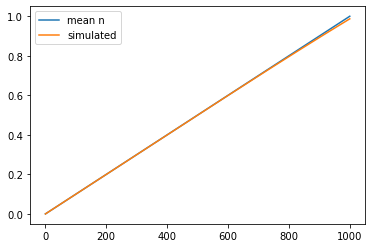

In [204]:
plt.plot(ts*1e6, n_exp, label='mean n')
plt.plot(ts*1e6, n_exp_simul, label='simulated')
plt.legend()
plt.show()

In [205]:
np.sum([i*pn_hist_thermal[-1][i] for i in range(len(pn_hist_thermal[-1]))])

0.9870040606500464

In [206]:
import yaml
with open('exp_data.yaml') as f:
    exp_data = yaml.load(f)['PMT1']

<ipython-input-206-8be3263cc81f>:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  exp_data = yaml.load(f)['PMT1']


In [207]:
thres = 3.5

In [208]:
ks = list(exp_data.keys())

In [209]:
count_data = []
for k in ks:
    c = 0
    for h in exp_data[k].keys():
        if h > 3.5:
            c += exp_data[k][h]
    count_data.append(c)
count_data = np.array(count_data) / np.max(count_data)

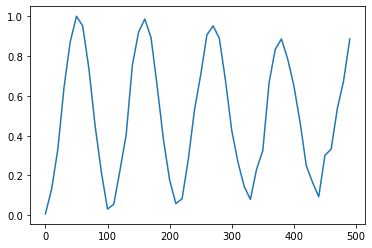

In [210]:
exp_times_max = 490e-6
exp_times = np.linspace(0, exp_times_max, len(count_data))
plt.plot(exp_times * 1e6, count_data)

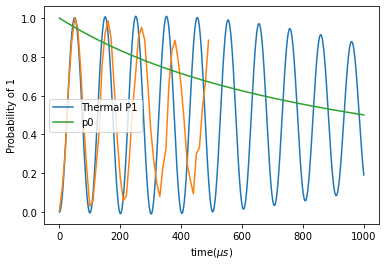

In [211]:
exp_times = np.linspace(0, exp_times_max, len(count_data))
t_plot = np.linspace(0, dt * len(p1_thermal), len(p1_thermal))

plt.plot(t_plot * 1e6, p1_thermal, label='Thermal P1')
plt.plot(exp_times * 1e6, count_data)
plt.plot(t_plot * 1e6, pn_hist_thermal[:,0], label='p{}'.format(0))
plt.xlabel('time($\mu s$)')
plt.ylabel('Probability of 1')
plt.legend()
plt.show()

In [212]:
import yaml
with open('sbc_cooling_N=50_pi=100us_carrier_3ms.yaml') as f:
    exp_data2 = yaml.load(f)['PMT1']

<ipython-input-212-57ed30502886>:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  exp_data2 = yaml.load(f)['PMT1']


In [159]:
thres = 7
ks = list(exp_data2.keys())
count_data = []
for k in ks:
    c = 0
    for h in exp_data2[k].keys():
        if h > thres:
            c += exp_data2[k][h]
    count_data.append(c)
count_data = np.array(count_data) / np.max(count_data)
# count_data = np.array(count_data) / 300

In [160]:
ks[-1]

'time=2990.0us'

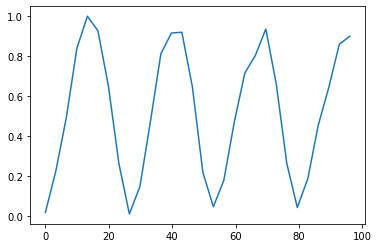

In [161]:
exp_times_max2 = 990e-6
exp_times = np.linspace(0, exp_times_max2, len(count_data))
plt.plot(exp_times[:30] * 1e6, count_data[:30])

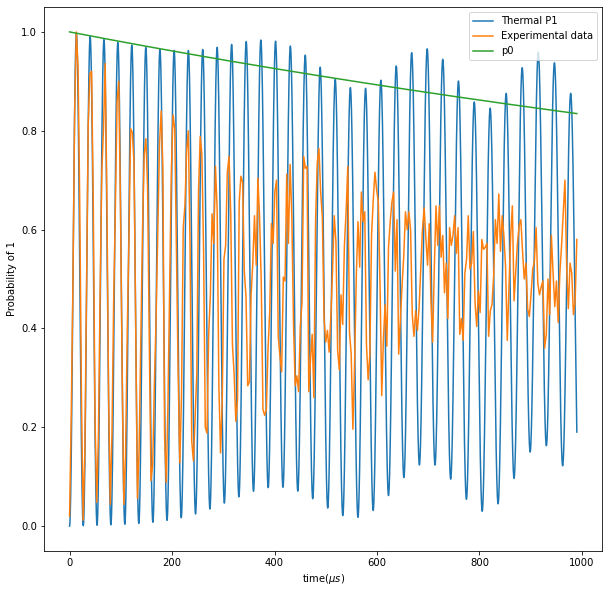

In [162]:
t_plot = np.linspace(0, dt * len(p1_thermal), len(p1_thermal))

plt.figure(figsize=(10,10))
plt.plot(t_plot * 1e6, p1_thermal, label='Thermal P1')
plt.plot(exp_times* 1e6, count_data, label='Experimental data')
plt.plot(t_plot * 1e6, pn_hist_thermal[:,0], label='p{}'.format(0))
plt.xlabel('time($\mu s$)')
plt.ylabel('Probability of 1')
plt.legend()
plt.show()

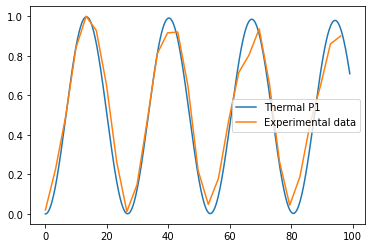

In [163]:
plt.plot(t_plot[:19800] * 1e6, p1_thermal[:19800], label='Thermal P1')
plt.plot(exp_times[:30] * 1e6, count_data[:30], label='Experimental data')
plt.legend()
plt.show()